App suggested
 - Preparing the Data Cleaning the data to remove unwanted data,
missing values, rows, and columns, duplicate values, data type conversion, etc.
 - Suggest the App based on the rating or Install count, size,
Price and category using any Algorithm
 - List-out App list

In [1]:
#Importing warning library to avoid any warnings'
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import Required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the datasets

In [3]:
df=pd.read_csv('googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
df.drop(columns=['Category','Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'], axis=1,inplace=True)
df.head()

,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1
1,Coloring book moana,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7
3,Sketch - Draw & Paint,4.5
4,Pixel Draw - Number Art Coloring Book,4.3


In [9]:
df.isnull().sum() # checking the null values

App          0
Rating    1474
dtype: int64

In [10]:
df = df.drop_duplicates() # Removing duplicates from data sets

In [11]:
df # After removing duplicates (10841-9678=803 duplicates were removed)

,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1
1,Coloring book moana,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7
3,Sketch - Draw & Paint,4.5
4,Pixel Draw - Number Art Coloring Book,4.3
...,...,...
10836,Sya9a Maroc - FR,4.5
10837,Fr. Mike Schmitz Audio Teachings,5.0
10838,Parkinson Exercices FR,NaN
10839,The SCP Foundation DB fr nn5n,4.5


In [12]:
# Removinng nan values
df = pd.DataFrame(df, columns =['App','Rating'])
df = df.dropna()

In [13]:
# Removed
df 

,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1
1,Coloring book moana,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7
3,Sketch - Draw & Paint,4.5
4,Pixel Draw - Number Art Coloring Book,4.3
...,...,...
10834,FR Calculator,4.0
10836,Sya9a Maroc - FR,4.5
10837,Fr. Mike Schmitz Audio Teachings,5.0
10839,The SCP Foundation DB fr nn5n,4.5


# Exploratory Data Analysis

Vishuvalisation through seaborn

<AxesSubplot:xlabel='Rating', ylabel='Density'>

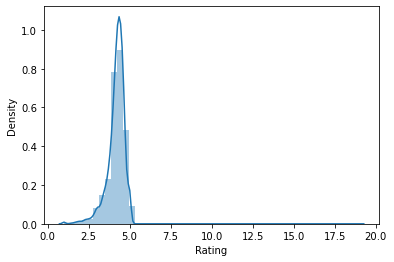

In [15]:
sns.distplot(df.Rating)

In [17]:
df.dtypes

App        object
Rating    float64
dtype: object

In [18]:
# converting categorical into numerical
#There are 1column present in the dataset having categorical data and we need to convert them into numerical data. 
#It can be done by using LabelEncoder
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['App'])

# printing label
label


array([5809, 2134, 7326, ..., 3701, 7099, 8049])

In [19]:
# removing the column 'App' from df
# as it is of no use now.
df.drop("App", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'App'
df["App"] = label

# printing Dataframe
df


,Rating,App
0,4.1,5809
1,3.9,2134
2,4.7,7326
3,4.5,6577
4,4.3,5865
...,...,...
10834,4.0,3410
10836,4.5,6896
10837,5.0,3701
10839,4.5,7099


<AxesSubplot:xlabel='App', ylabel='Density'>

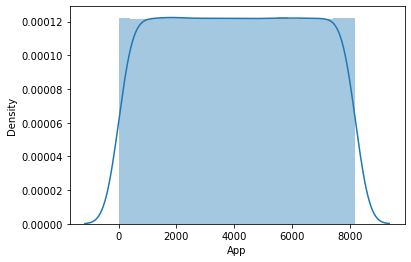

In [20]:
sns.distplot(df.App)

In [21]:
#Finding correlation Rating with App
df.App.corr(df.Rating)

0.02884144224926933

In [22]:
#Finding correlation 
df.corr()

,Rating,App
Rating,1.000000,0.028841
App,0.028841,1.000000


<AxesSubplot:>

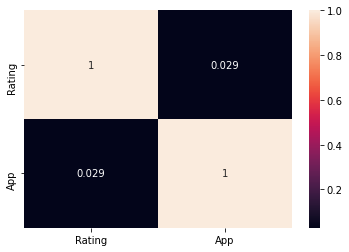

In [23]:
# Vishuvalise the correlation with heatmap
sns.heatmap(df.corr(),annot=True)

Creating Simle linear Regression model

In [24]:
# separating the  feature (App) 
x= df[['App']]
x.head()

,App
0,5809
1,2134
2,7326
3,6577
4,5865


In [25]:
#finding the type of x variable
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [26]:
#finding the shape of the x
print(x.shape)

(8214, 1)


In [27]:
# seaparting the target variable
y=df.Rating

In [28]:
#finding the head 
y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [29]:
# finding the type of y and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(8214,)


In [30]:
#importing train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [31]:
# finding x_train,x_test,y_train,y_test shapes
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6160, 1)
(2054, 1)
(6160,)
(2054,)


In [32]:
#fit the model in to linear regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
#finding the model intercept
lr.intercept_

4.142405243931981

In [34]:
#finding coefficient
lr.coef_

array([7.42387929e-06])

In [35]:
#finding predicted values of y
y_pred=lr.predict(x_test)

In [36]:
#getting the values of y using slicing 
y_pred[:5]

array([4.1930658 , 4.15922033, 4.14661458, 4.1964882 , 4.15811417])

In [37]:
#creating dataframe for Actual and predicted values
df= pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

      Actual  Predicted
75       4.6   4.193066
8096     4.5   4.159220
612      5.0   4.146615
8858     3.8   4.196488
6929     4.5   4.158114
...      ...        ...
4787     2.7   4.200185
4855     4.5   4.142717
2323     4.7   4.152539
5046     4.5   4.143860
8277     4.5   4.167632

[2054 rows x 2 columns]


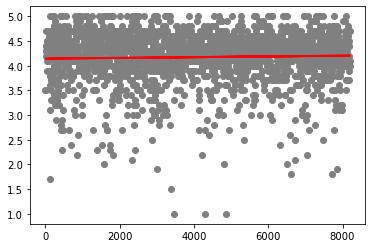

In [38]:
#plotting the modeel in to scatter plot
plt.scatter(x_test,y_test,color='grey')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()